##  Data import and preprocessing

In [1]:
import os
import pandas as pd

directory_path = "/Users/katerynaburovova/PycharmProjects/dehumanization/annotation/annotation_by_types/rows_by_types"
file_list = []
for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        with open(os.path.join(directory_path, filename), "r") as file:
            file_content = file.read()
        file_list.append({"text": file_content, "file_name": filename})

df_datarows = pd.DataFrame(file_list)

In [2]:
df_datarows.rename(columns={'file_name':'External ID'}, inplace=True)
df_datarows

,text,External ID
0,🇺🇦💥Шесть ракет из «Хаймарсов» укронацисты выпу...,row_1281.txt
1,🇺🇦Украинское общество «устало от войны и игнор...,row_479.txt
2,❗️Вследствие украинской вооруженной агрессии а...,row_1295.txt
3,"А второе – беспощадно, системно, четко, не щад...",row_337.txt
4,"Укронацики могут только стариков, женщин и дет...",row_451.txt
...,...,...
1562,"Где стоят, куда передвигаются и откуда стреляе...",row_306.txt
1563,"Я уверен, что в скором времени Силы Русской ко...",row_460.txt
1564,‼️В Белгороде задержаны очередные сторонники у...,row_474.txt
1565,"Да уж, подвести научную базу под вандализм - д...",row_1298.txt


In [3]:
# df_labels_CoNLL04 = pd.read_json('/Users/katerynaburovova/PycharmProjects/dehumanization/annotation/CoNLL04_annotation/export_test_CoNLL04.json')
df_labels_CoNLL04 = pd.read_json('/Users/katerynaburovova/PycharmProjects/dehumanization/annotation/CoNLL04_annotation/SpERT_dataset/export_400samples.json')

In [4]:
all_feature_objects = ['HIGH_UH_LOW_NH', 'LOW_UH_LOW_NH', 'LOW_UH_HIGH_NH', 'HIGH_UH_HIGH_NH', 'Ukrainian']

In [5]:
for feature_object in all_feature_objects:
    df_labels_CoNLL04[feature_object] = None
    df_labels_CoNLL04[feature_object] = df_labels_CoNLL04[feature_object].astype(object)

In [6]:
def process_row(row):
    objects = row['Label']['objects']
    for obj in objects:
        title = obj['title']
        if title in all_feature_objects:
            data = obj['data']
            if row[title] is None:
                row[title] = [data]
            else:
                row[title].append(data)
    return row

In [7]:
df_labels_CoNLL04 = df_labels_CoNLL04.apply(process_row, axis=1)

In [8]:
df_labels_CoNLL04

,ID,DataRow ID,Labeled Data,Label,Created By,Project Name,Created At,Updated At,Seconds to Label,Seconds to Review,...,Reviews,View Label,Has Open Issues,Skipped,DataRow Workflow Info,HIGH_UH_LOW_NH,LOW_UH_LOW_NH,LOW_UH_HIGH_NH,HIGH_UH_HIGH_NH,Ukrainian
0,clgqhfqn1010v070vcuro9rri,clgqh8xww4hq007904dz43b2e,https://storage.labelbox.com/cldvi451e3lej07ww...,{'objects': [{'featureId': 'clgqhia07003t3b6lg...,kateryna.burovova@ucu.edu.ua,Dehumanization CoNLL04,2023-04-21T11:46:28.000Z,2023-04-21T11:46:28.000Z,134.946,27.005,...,[],https://editor.labelbox.com?project=clgqhddt80...,0,False,"{'taskName': 'Done', 'Workflow History': [{'ac...","[{'location': {'start': 76, 'end': 87}}]",None,None,None,"[{'location': {'start': 76, 'end': 87}}]"
1,clgqhi4t5099q072t1xev0cet,clgqh8xww4hq407903lrc1c41,https://storage.labelbox.com/cldvi451e3lej07ww...,{'objects': [{'featureId': 'clgqhkj2a005s3b6la...,kateryna.burovova@ucu.edu.ua,Dehumanization CoNLL04,2023-04-21T11:47:05.000Z,2023-04-21T13:28:40.000Z,75.685,39.954,...,[],https://editor.labelbox.com?project=clgqhddt80...,0,False,"{'taskName': 'Done', 'Workflow History': [{'ac...",None,None,"[{'location': {'start': 26, 'end': 38}}]",None,"[{'location': {'start': 15, 'end': 38}}]"
2,clgqhkeff0g4m07zg87mue234,clgqh8xww4hq8079076quhoxb,https://storage.labelbox.com/cldvi451e3lej07ww...,{'objects': [{'featureId': 'clgql8vs900ak3b6j2...,kateryna.burovova@ucu.edu.ua,Dehumanization CoNLL04,2023-04-21T11:49:34.000Z,2023-04-21T13:29:42.000Z,189.535,41.696,...,[],https://editor.labelbox.com?project=clgqhddt80...,0,False,"{'taskName': 'Done', 'Workflow History': [{'ac...",None,None,None,None,"[{'location': {'start': 16, 'end': 25}}]"
3,clgqhl5kw00dc07274ihj7fos,clgqh8xww4hqc079056l1hqhv,https://storage.labelbox.com/cldvi451e3lej07ww...,{'objects': [{'featureId': 'clgqhofag00o63b6lk...,kateryna.burovova@ucu.edu.ua,Dehumanization CoNLL04,2023-04-21T11:50:28.000Z,2023-04-21T13:30:40.000Z,144.299,56.493,...,[],https://editor.labelbox.com?project=clgqhddt80...,0,False,{'Workflow History': []},None,None,"[{'location': {'start': 34, 'end': 45}}, {'loc...",None,"[{'location': {'start': 34, 'end': 45}}, {'loc..."
4,clgqhobw60i8x0700gzrs0lpt,clgqh8xww4hqg07902lws8quw,https://storage.labelbox.com/cldvi451e3lej07ww...,{'objects': [{'featureId': 'clgqhpkvp00rd3b6lb...,kateryna.burovova@ucu.edu.ua,Dehumanization CoNLL04,2023-04-21T11:50:46.000Z,2023-04-21T17:31:13.000Z,182.920,146.624,...,[],https://editor.labelbox.com?project=clgqhddt80...,0,False,"{'taskName': 'Done', 'Workflow History': [{'ac...","[{'location': {'start': 80, 'end': 88}}]",None,None,None,"[{'location': {'start': 80, 'end': 88}}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,clh7ijhvb02iv07ub7dqw4kau,clgqh8xxk4iqo07907z5m4mem,https://storage.labelbox.com/cldvi451e3lej07ww...,{'objects': [{'featureId': 'clh7ikjsu02x53b6ly...,kateryna.burovova@ucu.edu.ua,Dehumanization CoNLL04,2023-05-03T09:46:45.000Z,2023-05-03T09:46:45.000Z,23.571,0.000,...,[],https://editor.labelbox.com?project=clgqhddt80...,0,False,"{'taskName': 'Initial review task', 'Workflow ...","[{'location': {'start': 75, 'end': 115}}]",None,None,None,None
474,clh7ik4vl03yb07ww2zf4dejp,clgqh8xxk4iqs079068gj65xs,https://storage.labelbox.com/cldvi451e3lej07ww...,{'objects': [{'featureId': 'clh7il5nc037e3b6lo...,kateryna.burovova@ucu.edu.ua,Dehumanization CoNLL04,2023-05-03T09:47:11.000Z,2023-05-03T09:47:11.000Z,24.676,0.000,...,[],https://editor.labelbox.com?project=clgqhddt80...,0,False,"{'taskName': 'Initial review task', 'Workflow ...",None,None,None,None,"[{'location': {'start': 271, 'end': 300}}]"
475,clh7iknbf03yx07wwdb3q4s69,clgqh8xxl00pt076odhgfhqpr,https://storage.labelbox.com/cldvi451e3lej07ww...,{'objects': [{'featureId': 'clh7ilf1q03853b6l0...,kateryna.burovova@ucu.edu.ua,Dehumanization CoNLL04,2023-05-03T09:47:25.000Z,2023-05-03T09:47:26.000Z,14.770,0.000,...,[],https://editor.labelbox.com?project=clgqhddt80...,0,False,"{'taskName': 'Init

In [9]:
len(df_labels_CoNLL04)

478

In [10]:
df_merged = pd.merge(df_labels_CoNLL04, df_datarows, on='External ID', how='left')

## Getting spacy token indices

In [11]:
df_merged

,ID,DataRow ID,Labeled Data,Label,Created By,Project Name,Created At,Updated At,Seconds to Label,Seconds to Review,...,View Label,Has Open Issues,Skipped,DataRow Workflow Info,HIGH_UH_LOW_NH,LOW_UH_LOW_NH,LOW_UH_HIGH_NH,HIGH_UH_HIGH_NH,Ukrainian,text
0,clgqhfqn1010v070vcuro9rri,clgqh8xww4hq007904dz43b2e,https://storage.labelbox.com/cldvi451e3lej07ww...,{'objects': [{'featureId': 'clgqhia07003t3b6lg...,kateryna.burovova@ucu.edu.ua,Dehumanization CoNLL04,2023-04-21T11:46:28.000Z,2023-04-21T11:46:28.000Z,134.946,27.005,...,https://editor.labelbox.com?project=clgqhddt80...,0,False,"{'taskName': 'Done', 'Workflow History': [{'ac...","[{'location': {'start': 76, 'end': 87}}]",None,None,None,"[{'location': {'start': 76, 'end': 87}}]",Хорошее видео от 4 бригады НМ ЛНР https://t.me...
1,clgqhi4t5099q072t1xev0cet,clgqh8xww4hq407903lrc1c41,https://storage.labelbox.com/cldvi451e3lej07ww...,{'objects': [{'featureId': 'clgqhkj2a005s3b6la...,kateryna.burovova@ucu.edu.ua,Dehumanization CoNLL04,2023-04-21T11:47:05.000Z,2023-04-21T13:28:40.000Z,75.685,39.954,...,https://editor.labelbox.com?project=clgqhddt80...,0,False,"{'taskName': 'Done', 'Workflow History': [{'ac...",None,None,"[{'location': {'start': 26, 'end': 38}}]",None,"[{'location': {'start': 15, 'end': 38}}]",И по видосам с укропскими свинособаками это ви...
2,clgqhkeff0g4m07zg87mue234,clgqh8xww4hq8079076quhoxb,https://storage.labelbox.com/cldvi451e3lej07ww...,{'objects': [{'featureId': 'clgql8vs900ak3b6j2...,kateryna.burovova@ucu.edu.ua,Dehumanization CoNLL04,2023-04-21T11:49:34.000Z,2023-04-21T13:29:42.000Z,189.535,41.696,...,https://editor.labelbox.com?project=clgqhddt80...,0,False,"{'taskName': 'Done', 'Workflow History': [{'ac...",None,None,None,None,"[{'location': {'start': 16, 'end': 25}}]",Приунывшие было укропианцы снова бодрятся и др...
3,clgqhl5kw00dc07274ihj7fos,clgqh8xww4hqc079056l1hqhv,https://storage.labelbox.com/cldvi451e3lej07ww...,{'objects': [{'featureId': 'clgqhofag00o63b6lk...,kateryna.burovova@ucu.edu.ua,Dehumanization CoNLL04,2023-04-21T11:50:28.000Z,2023-04-21T13:30:40.000Z,144.299,56.493,...,https://editor.labelbox.com?project=clgqhddt80...,0,False,{'Workflow History': []},None,None,"[{'location': {'start': 34, 'end': 45}}, {'loc...",None,"[{'location': {'start': 34, 'end': 45}}, {'loc...",Снимая фото и видео своих позиций укропоросята...
4,clgqhobw60i8x0700gzrs0lpt,clgqh8xww4hqg07902lws8quw,https://storage.labelbox.com/cldvi451e3lej07ww...,{'objects': [{'featureId': 'clgqhpkvp00rd3b6lb...,kateryna.burovova@ucu.edu.ua,Dehumanization CoNLL04,2023-04-21T11:50:46.000Z,2023-04-21T17:31:13.000Z,182.920,146.624,...,https://editor.labelbox.com?project=clgqhddt80...,0,False,"{'taskName': 'Done', 'Workflow History': [{'ac...","[{'location': {'start': 80, 'end': 88}}]",None,None,None,"[{'location': {'start': 80, 'end': 88}}]","Сейчас все обсуждают то, что наши ВС должны бы..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,clh7ijhvb02iv07ub7dqw4kau,clgqh8xxk4iqo07907z5m4mem,https://storage.labelbox.com/cldvi451e3lej07ww...,{'objects': [{'featureId': 'clh7ikjsu02x53b6ly...,kateryna.burovova@ucu.edu.ua,Dehumanization CoNLL04,2023-05-03T09:46:45.000Z,2023-05-03T09:46:45.000Z,23.571,0.000,...,https://editor.labelbox.com?project=clgqhddt80...,0,False,"{'taskName': 'Initial review task', 'Workflow ...","[{'location': {'start': 75, 'end': 115}}]",None,None,None,None,Онуфрий сознательно нарушил правила Церкви рад...
474,clh7ik4vl03yb07ww2zf4dejp,clgqh8xxk4iqs079068gj65xs,https://storage.labelbox.com/cldvi451e3lej07ww...,{'objects': [{'featureId': 'clh7il5nc037e3b6lo...,kateryna.burovova@ucu.edu.ua,Dehumanization CoNLL04,2023-05-03T09:47:11.000Z,2023-05-03T09:47:11.000Z,24.676,0.000,...,https://editor.labelbox.com?project=clgqhddt80...,0,False,"{'taskName': 'Initial review task', 'Workflow ...",None,None,None,None,"[{'location': {'start': 271, 'end': 300}}]",Разве нормальный человек может это поддерживат...
475,clh7iknbf03yx07wwdb3q4s

In [12]:
import spacy

nlp = spacy.load("ru_core_news_sm")

In [13]:
def find_token_positions(doc, char_start, char_end):
    char_to_token_map = {}
    for token in doc:
        for char_pos in range(token.idx, token.idx + len(token)):
            char_to_token_map[char_pos] = token.i

    token_start = char_to_token_map.get(char_start)
    token_end = char_to_token_map.get(char_end - 1)

    # If token_start is not found, try to find the closest token before the char_start
    if token_start is None:
        for char_pos in range(char_start - 1, -1, -1):
            token_start = char_to_token_map.get(char_pos)
            if token_start is not None:
                break

    # If token_end is not found, set it equal to token_start
    if token_start is not None and token_end is None:
        token_end = token_start

    return token_start, token_end

In [14]:
def get_spert_entities(df, text_column, feature_columns):
    spert_data = []

    for _, row in df.iterrows():
        text = row[text_column]
        doc = nlp(text)
        # tokens = [token.text for token in doc]
        #
        # if not tokens:
        #     print(f"Skipping entry with empty tokens list for text: {text}")
        #     continue

        entities = []
        for idx, feature_column in enumerate(feature_columns):
            char_spans = row[feature_column]

            if char_spans is not None:
                for span in char_spans:
                    char_start = span['location']['start']
                    char_end = span['location']['end']
                    token_start, token_end = find_token_positions(doc, char_start, char_end)

                    entity = {
                        "type": feature_column,
                        "start": token_start,
                        # "end": token_end
                        "end": token_end+1
                    }
                    entities.append(entity)

        spert_data.append({
            "tokens": [token.text for token in doc],
            "entities": entities,
            "relations": []
        })

    return spert_data


In [248]:
text_column = 'text'
feature_columns = all_feature_objects
spert_data = get_spert_entities(df_merged, text_column, feature_columns)
print(spert_data)

[{'tokens': ['Хорошее', 'видео', 'от', '4', 'бригады', 'НМ', 'ЛНР', 'https://t.me/Z4LPR/214', ',', 'обработка', 'позиций', 'укронацистов', 'пифтонными', 'бомбами', '.'], 'entities': [{'type': 'HIGH_UH_LOW_NH', 'start': 11, 'end': 12}, {'type': 'Ukrainian', 'start': 11, 'end': 12}], 'relations': []}, {'tokens': ['И', 'по', 'видосам', 'с', 'укропскими', 'свинособаками', 'это', 'видно', 'хорошо', '.'], 'entities': [{'type': 'LOW_UH_HIGH_NH', 'start': 5, 'end': 6}, {'type': 'Ukrainian', 'start': 4, 'end': 6}], 'relations': []}, {'tokens': ['Приунывшие', 'было', 'укропианцы', 'снова', 'бодрятся', 'и', 'друг', 'друга', 'бодрят', ':', '"', 'Мониторинговая', 'группа', 'BlackSeaNews', 'и', 'Института', 'Черноморских', 'стратегических', 'исследований', 'сообщает', ',', 'что', 'оба', 'американских', 'ракетных', 'эсминца', 'USS', 'Donald', 'Cook', '(', 'DDG-75', ')', 'и', 'USS', 'Roosevelt', '(', 'DDG-80', ')', 'вновь', 'вышли', 'с', 'базы', 'на', 'острове', 'Крит', 'в', 'направлении', 'черноморск

In [249]:
import json
def save_spert_data(spert_data, file_path):
    with open(file_path, 'w', encoding='utf-8') as f:
        json.dump(spert_data, f, ensure_ascii=False, indent=2)

In [250]:
file_path = "/Users/katerynaburovova/PycharmProjects/dehumanization/annotation/CoNLL04_annotation/final_spert_data_M.json"
save_spert_data(spert_data, file_path)

In [251]:
import json

def check_empty_tokens(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)

    empty_tokens_count = 0
    for index, entry in enumerate(data):
        if not entry['tokens']:
            print(f"Entry {index} has an empty tokens list")
            empty_tokens_count += 1

    print(f"Total entries with empty tokens: {empty_tokens_count}")

In [252]:
check_empty_tokens(file_path)

Total entries with empty tokens: 0


In [253]:
# import json
#
# # Load the JSON file
# with open('input.json', 'r') as f:
#     data = json.load(f)

file_path = "/Users/katerynaburovova/PycharmProjects/dehumanization/annotation/CoNLL04_annotation/final_spert_data_M_w_ids.json"

# Iterate over the data points and add a unique 'orig_id' key
for i, data_point in enumerate(spert_data):
    data_point['orig_id'] = i

# Save the modified data back to a JSON file
with open(file_path, 'w') as f:
    json.dump(spert_data, f, indent=2)

In [254]:
filtered_data = [datapoint for datapoint in spert_data if datapoint['entities']]
file_path = "/Users/katerynaburovova/PycharmProjects/dehumanization/annotation/CoNLL04_annotation/final_spert_data_S_w_ids.json"

# Save the modified data back to a JSON file
with open(file_path, 'w') as f:
    json.dump(filtered_data, f, indent=2)

## Saving SpERT datasets

In [255]:
from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(filtered_data, test_size=0.2, random_state=42)
dev_data, test_data = train_test_split(filtered_data, test_size=0.2, random_state=42)

In [256]:
with open("/Users/katerynaburovova/PycharmProjects/dehumanization/spert/data/datasets/dehumanization_spert_dataset_M/conll04_train.json", "w", encoding="utf-8") as f:
    json.dump(train_data, f, ensure_ascii=False)

with open("/Users/katerynaburovova/PycharmProjects/dehumanization/spert/data/datasets/dehumanization_spert_dataset_M/conll04_dev.json", "w", encoding="utf-8") as f:
    json.dump(dev_data, f, ensure_ascii=False)

with open("/Users/katerynaburovova/PycharmProjects/dehumanization/spert/data/datasets/dehumanization_spert_dataset_M/conll04_test.json", "w", encoding="utf-8") as f:
    json.dump(test_data, f, ensure_ascii=False)

In [217]:
entity_types = {
    feature_column: {
        "id": idx,
        "short": feature_column,
        "verbose": feature_column  # You can replace this with a more verbose description if needed
    }
    for idx, feature_column in enumerate(feature_columns)
}

types_data = {
    "entities": entity_types,
    "relations": {}  # You can add relation types here if you have any
}

with open("/Users/katerynaburovova/PycharmProjects/dehumanization/spert/data/datasets/dehumanization_spert_dataset/conll04_types.json", "w", encoding="utf-8") as f:
    json.dump(types_data, f, ensure_ascii=False)


In [197]:
from collections import OrderedDict

types = json.load(open("/Users/katerynaburovova/PycharmProjects/dehumanization/spert/data/datasets/conll04/conll04_types.json"), object_pairs_hook=OrderedDict)

In [198]:
types['entities'].items()

odict_items([('HIGH_UH_LOW_NH', OrderedDict([('id', 0), ('short', 'HIGH_UH_LOW_NH'), ('verbose', 'HIGH_UH_LOW_NH')])), ('LOW_UH_LOW_NH', OrderedDict([('id', 1), ('short', 'LOW_UH_LOW_NH'), ('verbose', 'LOW_UH_LOW_NH')])), ('LOW_UH_HIGH_NH', OrderedDict([('id', 2), ('short', 'LOW_UH_HIGH_NH'), ('verbose', 'LOW_UH_HIGH_NH')])), ('HIGH_UH_HIGH_NH', OrderedDict([('id', 3), ('short', 'HIGH_UH_HIGH_NH'), ('verbose', 'HIGH_UH_HIGH_NH')])), ('Ukrainian', OrderedDict([('id', 4), ('short', 'Ukrainian'), ('verbose', 'Ukrainian')]))])

In [199]:
for i, (key, v) in enumerate(types['entities'].items()):
    entity_type_ = [key, i + 1, v['short'], v['verbose']]
    print(entity_type_)

['HIGH_UH_LOW_NH', 1, 'HIGH_UH_LOW_NH', 'HIGH_UH_LOW_NH']
['LOW_UH_LOW_NH', 2, 'LOW_UH_LOW_NH', 'LOW_UH_LOW_NH']
['LOW_UH_HIGH_NH', 3, 'LOW_UH_HIGH_NH', 'LOW_UH_HIGH_NH']
['HIGH_UH_HIGH_NH', 4, 'HIGH_UH_HIGH_NH', 'HIGH_UH_HIGH_NH']
['Ukrainian', 5, 'Ukrainian', 'Ukrainian']


## SpERT dataset preparation without UKR tags

In [276]:
from collections import OrderedDict

types_reduced = json.load(open("/Users/katerynaburovova/PycharmProjects/dehumanization/annotation/CoNLL04_annotation/conll04_types_reduced.json"), object_pairs_hook=OrderedDict)

In [282]:
feature_columns_reduced = [x for x in feature_columns if x!='Ukrainian']

In [283]:
feature_columns_reduced

['HIGH_UH_LOW_NH', 'LOW_UH_LOW_NH', 'LOW_UH_HIGH_NH', 'HIGH_UH_HIGH_NH']

In [285]:
entity_types_reduced = {
    feature_column: {
        "id": idx,
        "short": feature_column,
        "verbose": feature_column  # You can replace this with a more verbose description if needed
    }
    for idx, feature_column in enumerate(feature_columns_reduced)
}

types_data_reduced = {
    "entities": entity_types_reduced,
    "relations": {}  # You can add relation types here if you have any
}

with open("/Users/katerynaburovova/PycharmProjects/dehumanization/spert/data/datasets/dehumanization_spert_reduced_M/conll04_types_reduced.json", "w", encoding="utf-8") as f:
    json.dump(types_data_reduced, f, ensure_ascii=False)

In [286]:
types_reduced = json.load(open("/Users/katerynaburovova/PycharmProjects/dehumanization/spert/data/datasets/dehumanization_spert_reduced_M/conll04_types_reduced.json"), object_pairs_hook=OrderedDict)

In [287]:
types_reduced['entities'].items()

odict_items([('HIGH_UH_LOW_NH', OrderedDict([('id', 0), ('short', 'HIGH_UH_LOW_NH'), ('verbose', 'HIGH_UH_LOW_NH')])), ('LOW_UH_LOW_NH', OrderedDict([('id', 1), ('short', 'LOW_UH_LOW_NH'), ('verbose', 'LOW_UH_LOW_NH')])), ('LOW_UH_HIGH_NH', OrderedDict([('id', 2), ('short', 'LOW_UH_HIGH_NH'), ('verbose', 'LOW_UH_HIGH_NH')])), ('HIGH_UH_HIGH_NH', OrderedDict([('id', 3), ('short', 'HIGH_UH_HIGH_NH'), ('verbose', 'HIGH_UH_HIGH_NH')]))])

In [ ]:
# filtered_data = [datapoint for datapoint in spert_data if datapoint['entities']]
# file_path = "/Users/katerynaburovova/PycharmProjects/dehumanization/annotation/CoNLL04_annotation/final_spert_data_S_w_ids.json"

# # Save the modified data back to a JSON file
# with open(file_path, 'w') as f:
#     json.dump(filtered_data, f, indent=2)

In [298]:
filtered_data_test = filtered_data[:2]

In [301]:
reduced_filtered_data = filtered_data

In [302]:
for item in reduced_filtered_data:
    item['entities'] = [entity for entity in item['entities'] if entity['type'] != 'Ukrainian']

In [303]:
reduced_filtered_data

[{'tokens': ['Хорошее',
   'видео',
   'от',
   '4',
   'бригады',
   'НМ',
   'ЛНР',
   'https://t.me/Z4LPR/214',
   ',',
   'обработка',
   'позиций',
   'укронацистов',
   'пифтонными',
   'бомбами',
   '.'],
  'entities': [{'type': 'HIGH_UH_LOW_NH', 'start': 11, 'end': 12}],
  'relations': [],
  'orig_id': 0},
 {'tokens': ['И',
   'по',
   'видосам',
   'с',
   'укропскими',
   'свинособаками',
   'это',
   'видно',
   'хорошо',
   '.'],
  'entities': [{'type': 'LOW_UH_HIGH_NH', 'start': 5, 'end': 6}],
  'relations': [],
  'orig_id': 1},
 {'tokens': ['Приунывшие',
   'было',
   'укропианцы',
   'снова',
   'бодрятся',
   'и',
   'друг',
   'друга',
   'бодрят',
   ':',
   '"',
   'Мониторинговая',
   'группа',
   'BlackSeaNews',
   'и',
   'Института',
   'Черноморских',
   'стратегических',
   'исследований',
   'сообщает',
   ',',
   'что',
   'оба',
   'американских',
   'ракетных',
   'эсминца',
   'USS',
   'Donald',
   'Cook',
   '(',
   'DDG-75',
   ')',
   'и',
   'USS',
  

In [304]:
file_path = "/Users/katerynaburovova/PycharmProjects/dehumanization/annotation/CoNLL04_annotation/final_spert_data_M_reduced_w_ids.json"

with open(file_path, 'w') as f:
    json.dump(reduced_filtered_data, f, indent=2)

In [306]:
train_data, temp_data = train_test_split(reduced_filtered_data, test_size=0.2, random_state=42)
dev_data, test_data = train_test_split(reduced_filtered_data, test_size=0.2, random_state=42)

In [307]:
with open("/Users/katerynaburovova/PycharmProjects/dehumanization/spert/data/datasets/dehumanization_spert_reduced_M/conll04_train.json", "w", encoding="utf-8") as f:
    json.dump(train_data, f, ensure_ascii=False)

with open("/Users/katerynaburovova/PycharmProjects/dehumanization/spert/data/datasets/dehumanization_spert_reduced_M/conll04_dev.json", "w", encoding="utf-8") as f:
    json.dump(dev_data, f, ensure_ascii=False)

with open("/Users/katerynaburovova/PycharmProjects/dehumanization/spert/data/datasets/dehumanization_spert_reduced_M/conll04_test.json", "w", encoding="utf-8") as f:
    json.dump(test_data, f, ensure_ascii=False)

## Original Labels Distribution

In [30]:
df_labels_CoNLL04['HIGH_UH_LOW_NH_'] = df_labels_CoNLL04['HIGH_UH_LOW_NH'].apply(lambda x: 1 if len(str(x))>5 else 0)
df_labels_CoNLL04['LOW_UH_LOW_NH_'] = df_labels_CoNLL04['LOW_UH_LOW_NH'].apply(lambda x: 1 if len(str(x))>5 else 0)
df_labels_CoNLL04['LOW_UH_HIGH_NH_'] = df_labels_CoNLL04['LOW_UH_HIGH_NH'].apply(lambda x: 1 if len(str(x))>5 else 0)
df_labels_CoNLL04['HIGH_UH_HIGH_NH_'] = df_labels_CoNLL04['HIGH_UH_HIGH_NH'].apply(lambda x: 1 if len(str(x))>5 else 0)
df_labels_CoNLL04['Ukrainian_'] = df_labels_CoNLL04['Ukrainian'].apply(lambda x: 1 if len(str(x))>5 else 0)

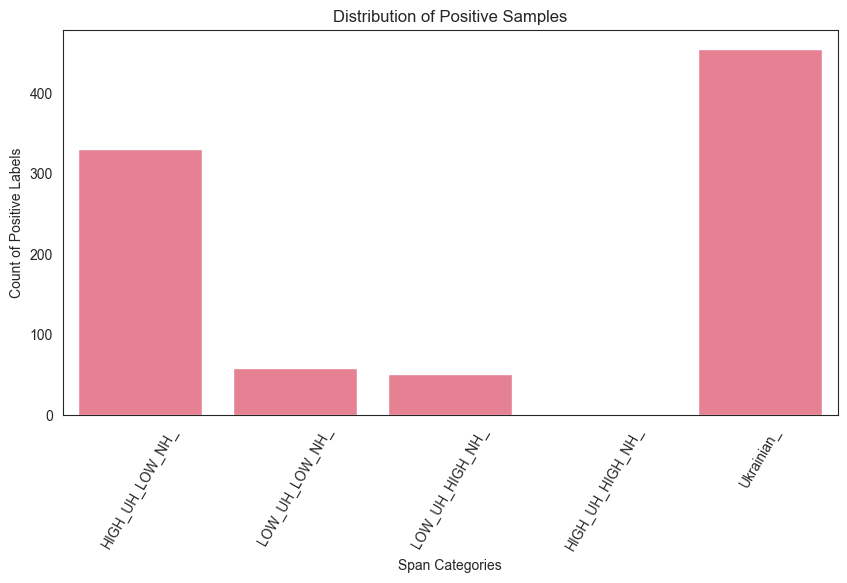

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")

columns = ['HIGH_UH_LOW_NH_', 'LOW_UH_LOW_NH_', 'LOW_UH_HIGH_NH_', 'HIGH_UH_HIGH_NH_', 'Ukrainian_']

df_positive = df_labels_CoNLL04[df_labels_CoNLL04[columns] == 1].melt(value_vars=columns)
palette = sns.color_palette("husl", len(columns))

plt.figure(figsize=(10,5))
sns.countplot(data=df_positive, x='variable', hue='value', palette=palette)
plt.legend().remove()
plt.xticks(rotation=60)
plt.title('Distribution of Positive Samples')
plt.xlabel('Span Categories')
plt.ylabel('Count of Positive Labels')
plt.show()
